<a href="https://colab.research.google.com/github/fidafebin/fida-febin.k/blob/main/Decisn_tree_c5_0_cart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/iris.csv')

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [5]:
label_encoder=preprocessing.LabelEncoder()
iris['Species']=label_encoder.fit_transform(iris['Species'])

In [6]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [7]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [8]:
iris['Species'].unique()

array([0, 1, 2])

In [9]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [10]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [11]:
colnames=list(iris.columns)
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

Building Decision Tree Classifier using Entropy Criteria

In [13]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [14]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

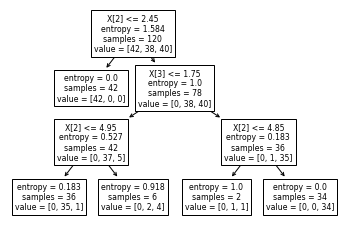

In [15]:
from sklearn import tree
tree.plot_tree(model);

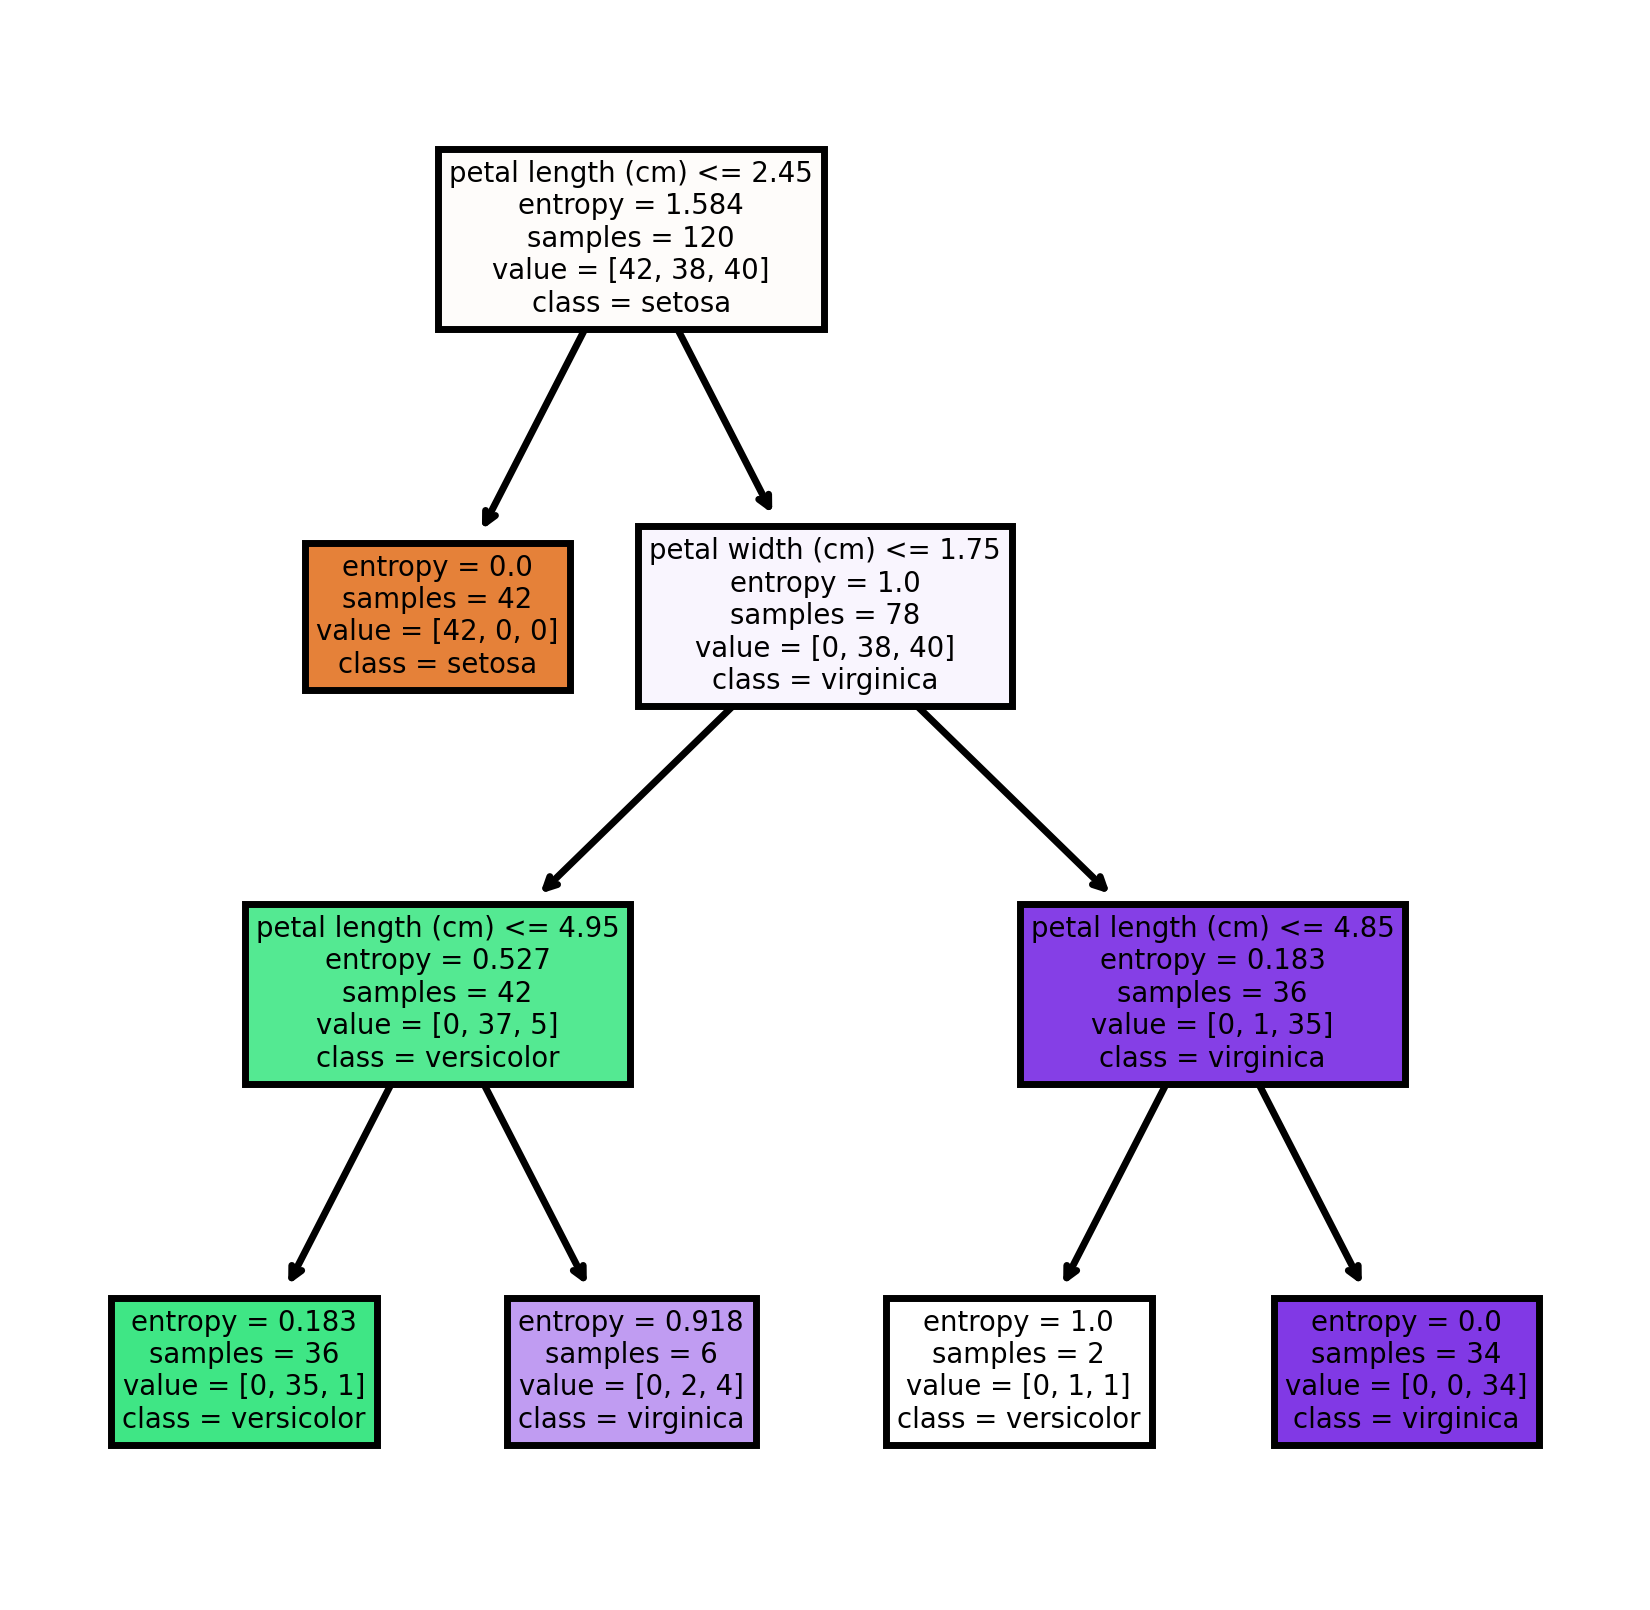

In [16]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=500)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [17]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    13
2     9
0     8
dtype: int64

In [18]:
y_test.value_counts()

1    12
2    10
0     8
Name: Species, dtype: int64

In [19]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [20]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

0.9666666666666667

In [22]:
np.mean(preds==y_test)

0.9666666666666667

Building Decision Tree Classifier (CART) using Gini Criteria

In [23]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [24]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

Decision Tree Regression Example

In [26]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [27]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [29]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
#Find the accuracy
model.score(X_test,y_test)

0.877311201824949